In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# 1.READ THE DATASET

In [14]:
df = pd.read_csv("heathcare1.csv")
print(df.head(15))

    Unnamed: 0  visits  gender   age  income  illness  reduced  health  \
0            1       1  female  0.19    0.55        1        4       1   
1            2       1  female  0.19    0.45        1        2       1   
2            3       1    male  0.19    0.90        3        0       0   
3            4       1    male  0.19    0.15        1        0       0   
4            5       1    male  0.19    0.45        2        5       1   
5            6       1  female  0.19    0.35        5        1       9   
6            7       1  female  0.19    0.55        4        0       2   
7            8       1  female  0.19    0.15        3        0       6   
8            9       1  female  0.19    0.65        2        0       5   
9           10       1    male  0.19    0.15        1        0       0   
10          11       1    male  0.19    0.45        1        0       0   
11          12       1    male  0.19    0.25        2        0       2   
12          13       2    male  0.19  

# 2.Display complete information about the columns of the dataset such as Column name, Count, Data type and overall memory usage

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


# 3.Find out the total number of people based on their count of illness

In [16]:
df["illness"].value_counts()

illness
1    1638
0    1554
2     946
3     542
4     274
5     236
Name: count, dtype: int64

# 4. Visualize and analyse the maximum, minimum and medium income

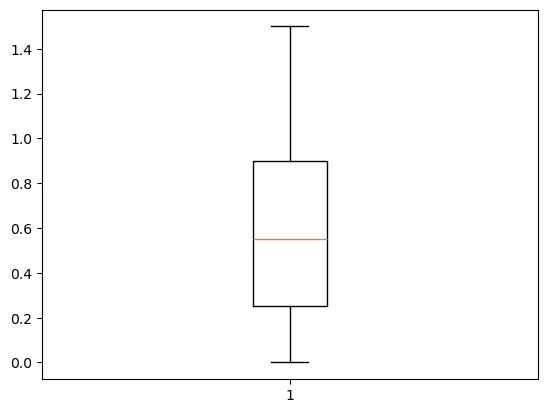

In [17]:
y = list(df.income)
plt.boxplot(y)
plt.show()

# 5.Find out the number of days of reduced activity of male and female separately due to illness

In [1]:
df.groupby(['gender', 'reduced']).mean()

NameError: name 'df' is not defined

# 6. Visualize is there is any missing value in the dataset based on a heat map

<Axes: >

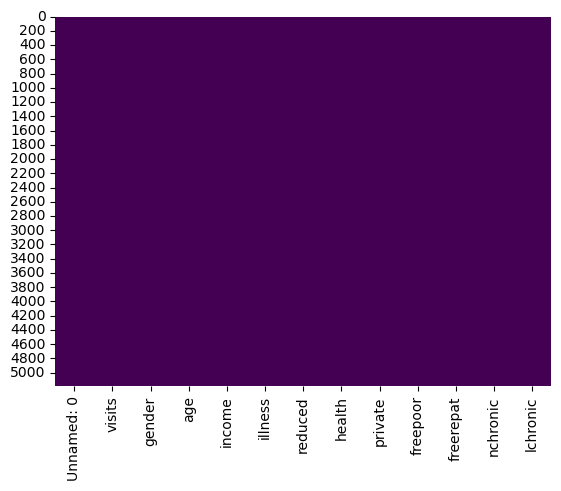

In [19]:
#missing values
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

# 7. Find out the correlation between variables in the given dataset correlation between different variables

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

ValueError: could not convert string to float: 'female'

<Figure size 1000x1000 with 0 Axes>

# 8. Analyse how the income of a patient affects the number of visits to the hospital

Text(0, 0.5, 'visits')

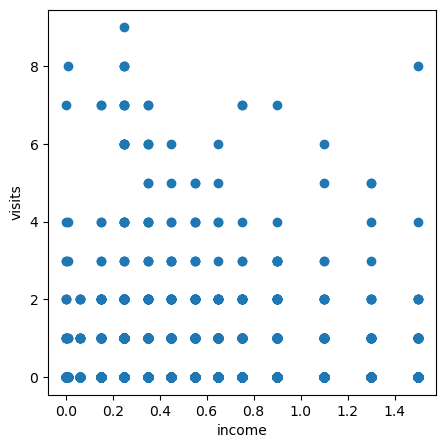

In [21]:
#relation between income and visits
plt.figure(figsize=(5,5))
plt.scatter(x='income',y='visits',data=df)
plt.xlabel('income')
plt.ylabel('visits')

# 9. Count and visualize the number of males and females affected by illness

<Axes: xlabel='gender', ylabel='Count'>

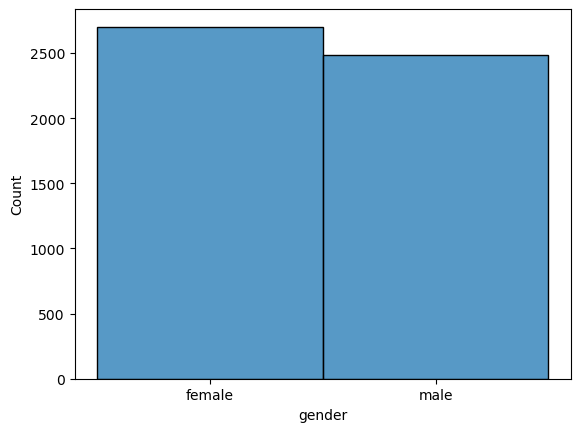

In [22]:
#number of male and female affected by illness
sns.histplot(df.gender,bins=2)

# 10. Visualize the percentage of people getting govt health Insurance due to low income, due to old age and also the percentage of people having private health insurance

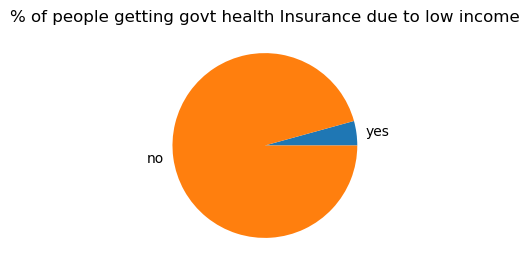

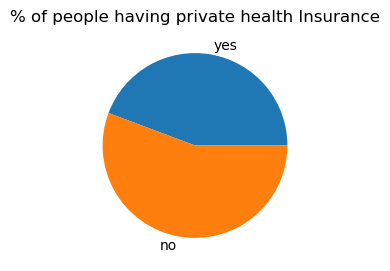

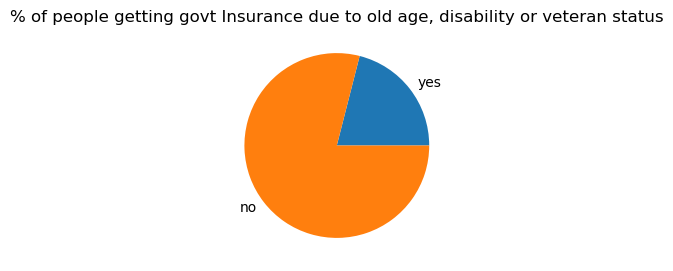

In [23]:
# % of people getting govt Insurance due to low income
label=['yes','no']
Y = df[df['freepoor']=='yes']
N = df[df['freepoor']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(3,3))
plt.pie(x,labels=label)
plt.title("% of people getting govt health Insurance due to low income")
plt.show()
# % of people having private Insurance
Y = df[df['private']=='yes']
N = df[df['private']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(3,3))
plt.pie(x,labels=label)
plt.title("% of people having private health Insurance")
plt.show()
# % of people getting govt Insurance due to old age, disability or veteran status
Y = df[df['freerepat']=='yes']
N = df[df['freerepat']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(3,3))
plt.pie(x,labels=label)
plt.title("% of people getting govt Insurance due to old age, disability or veteran status")
plt.show()

# 11. Plot a horizontal bar chart to analyze the reduced days of activity due to illness based on Gender

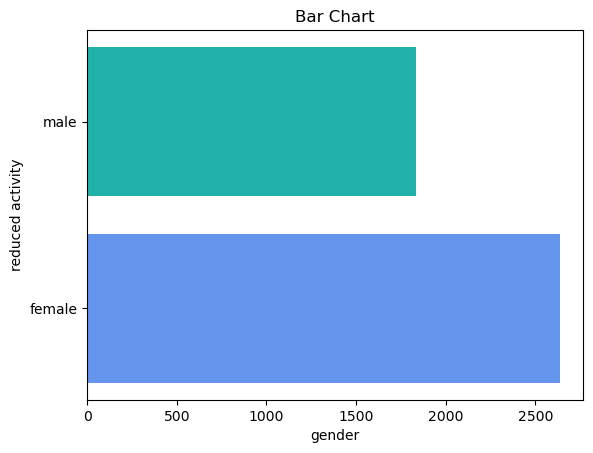

In [24]:
db = df.groupby('gender')['reduced'].sum().to_frame().reset_index()
#creating the bar chart
plt.barh(db['gender'],db['reduced'],color = ['cornflowerblue','lightseagreen'])
#Adding the aesthetics
plt.title('Bar Chart')
plt.xlabel('gender')
plt.ylabel('reduced activity')
#Show the plot
plt.show()